In [1]:
import pandas as pd
from pytz import utc
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('reviews.csv', parse_dates=['Timestamp'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Course Name  45000 non-null  object             
 1   Timestamp    45000 non-null  datetime64[ns, UTC]
 2   Rating       45000 non-null  float64            
 3   Comment      6799 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.4+ MB


In [4]:
df.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### group by date


In [5]:
df['week'] = df.Timestamp.dt.strftime('%Y-%W')

In [6]:
df['week'].nunique()

173

<AxesSubplot:xlabel='week'>

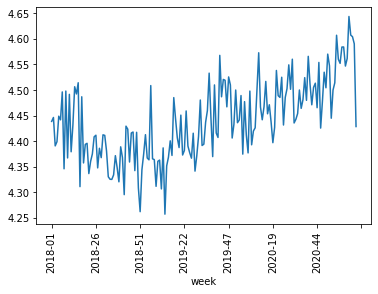

In [7]:
df.groupby('week').Rating.mean().plot(rot=90)

In [8]:
df['month'] = df.Timestamp.dt.strftime('%Y-%m')

<AxesSubplot:xlabel='month'>

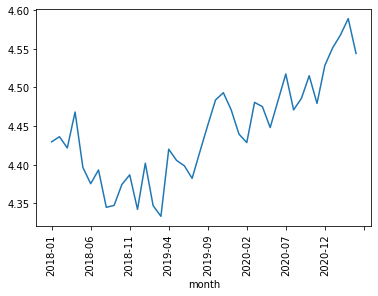

In [9]:
df.groupby('month').Rating.mean().plot(rot=90)

### group by course and month


In [10]:
df['Course Name'].nunique()

8

In [11]:
df_by_course_month = df.groupby(['month', 'Course Name']).Rating.mean().reset_index()

In [12]:
df_by_course_month.head()

,month,Course Name,Rating
0,2018-01,100 Python Exercises I: Evaluate and Improve Y...,4.353448
1,2018-01,Data Processing with Python,4.500000
2,2018-01,Interactive Data Visualization with Python and...,4.285714
3,2018-01,Learn GIS in One Hour,4.236842
4,2018-01,Python for Beginners with Examples,4.355422


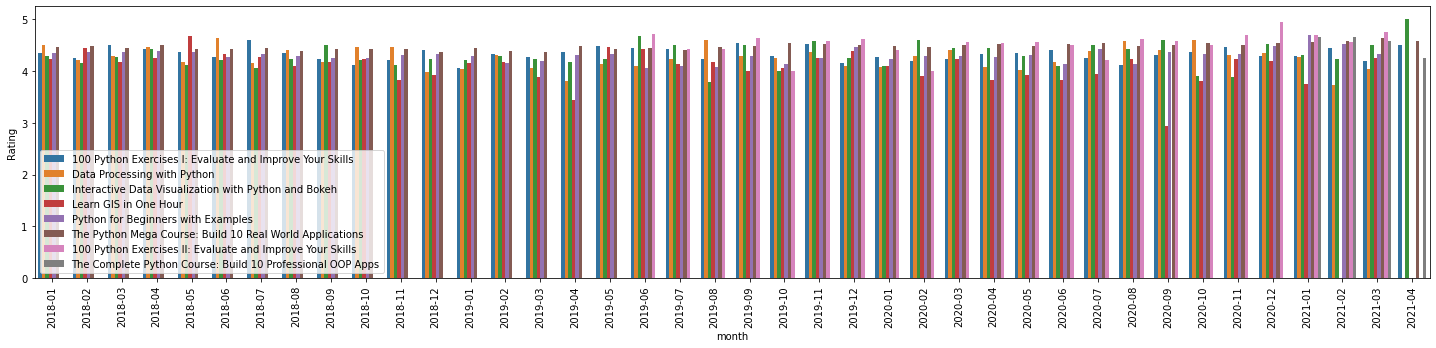

In [13]:
plt.figure(figsize=(25,5))
sns.barplot(data=df_by_course_month, x='month', y='Rating', hue='Course Name')
plt.xticks(rotation=90)
plt.legend(loc='lower left')
None

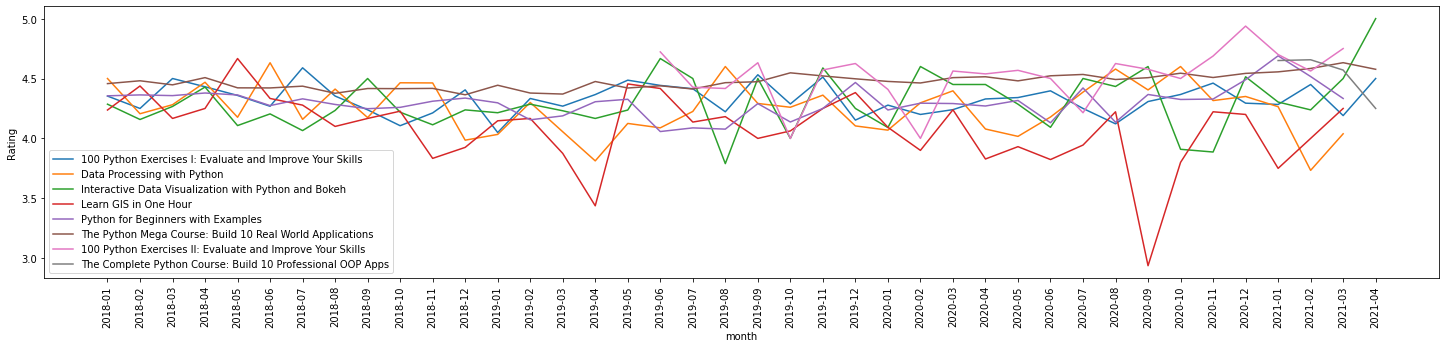

In [14]:
plt.figure(figsize=(25,5))
sns.lineplot(data=df_by_course_month, x='month', y='Rating', hue='Course Name')
plt.xticks(rotation=90)
plt.legend(loc='lower left')
None

In [15]:
df_by_course_month_unstack = df.groupby(['month', 'Course Name']).Rating.mean().unstack()

In [16]:
df_by_course_month_unstack.head()

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085


<AxesSubplot:xlabel='month'>

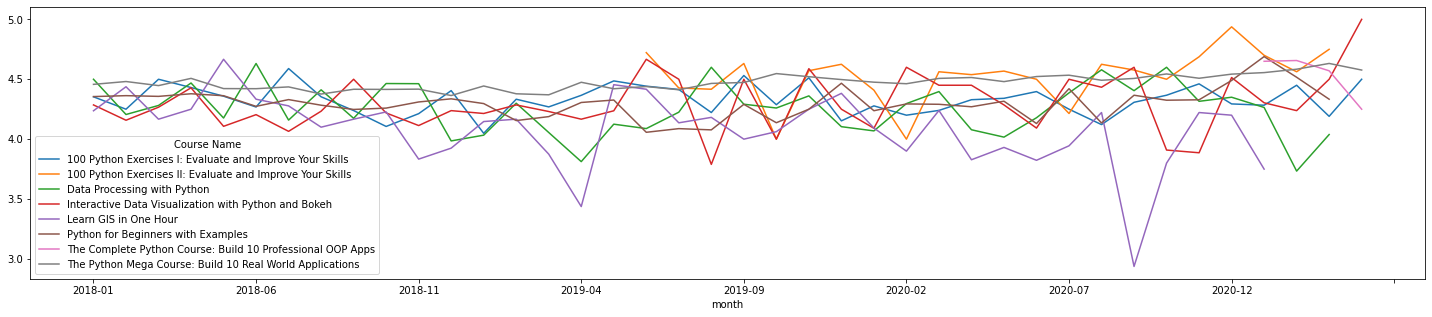

In [17]:
df_by_course_month_unstack.plot(figsize=(25,5))

### happiest day of week

<AxesSubplot:xlabel='day_of_week'>

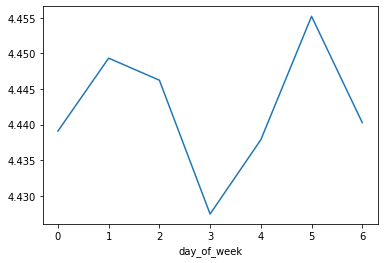

In [18]:
# Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
df['day_of_week'] = df.Timestamp.dt.strftime('%w')

df.groupby(['day_of_week']).Rating.mean().plot()

<AxesSubplot:xlabel='weekday,day_of_week'>

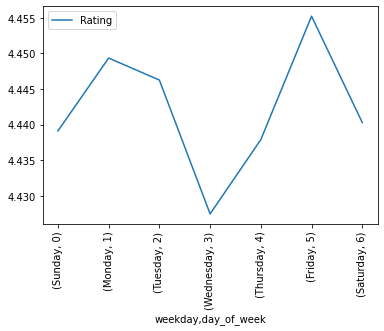

In [19]:
df['weekday'] = df.Timestamp.dt.strftime('%A')
df = df.sort_values('day_of_week')
df.groupby(['weekday', 'day_of_week']).mean().sort_values('day_of_week').plot(rot=90)

In [20]:
df_weekday = df.groupby(['weekday', 'day_of_week']).mean().sort_values('day_of_week')

In [21]:
df_weekday.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('Sunday', '0') to ('Saturday', '6')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  7 non-null      float64
dtypes: float64(1)
memory usage: 298.0+ bytes


In [22]:
df_weekday.index

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['weekday', 'day_of_week'])

In [23]:
df_weekday.index.get_level_values(0)

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='weekday')

In [24]:
df_weekday.index.get_level_values(1)

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='day_of_week')

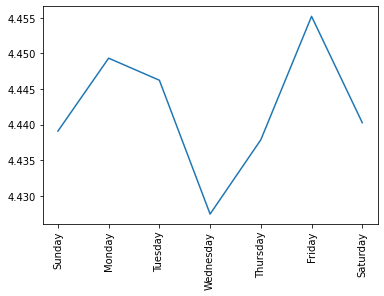

In [25]:
plt.plot(df_weekday.index.get_level_values(0), df_weekday.Rating)
plt.xticks(rotation=90)
None

### take away: Friday is the happiest

### pie chart

In [26]:
df_by_course_overall_count = df.groupby(['Course Name']).Rating.count()

In [27]:
df_by_course_overall_count

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

In [28]:
df_by_course_overall_count.to_list()

[1593, 280, 868, 767, 499, 4821, 470, 35702]

In [29]:
[{'name': a, 'y': b} for a, b in zip(df_by_course_overall_count.index, df_by_course_overall_count)]

[{'name': '100 Python Exercises I: Evaluate and Improve Your Skills',
  'y': 1593},
 {'name': '100 Python Exercises II: Evaluate and Improve Your Skills',
  'y': 280},
 {'name': 'Data Processing with Python', 'y': 868},
 {'name': 'Interactive Data Visualization with Python and Bokeh', 'y': 767},
 {'name': 'Learn GIS in One Hour', 'y': 499},
 {'name': 'Python for Beginners with Examples', 'y': 4821},
 {'name': 'The Complete Python Course: Build 10 Professional OOP Apps',
  'y': 470},
 {'name': 'The Python Mega Course: Build 10 Real World Applications',
  'y': 35702}]

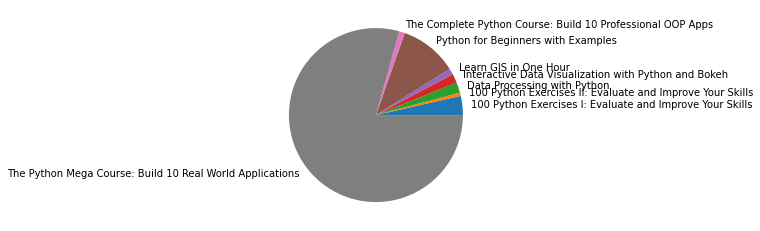

In [30]:
plt.pie(df_by_course_overall_count, labels=df_by_course_overall_count.index)
None